In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

from pathlib import Path
#设置数据文件夹路径
DATA = Path().resolve()  / 'data'

from scipy import stats
from scipy.stats import trim_mean


# 写在前面的话

## 


## 阅读本文之前，你需要了解

- 基本的 Python 知识
- 九年义务教育范围内的数学知识
- 一颗好奇心

# 用频数分布表和直方图，刻画数据的特征

我们在日常生活中多多少少都会使用数据。但是，光浏览原始数据，单纯列举数字，是没有任何意义的。

“打眼一瞧什么都不明白”这一点上，数据也好，现实也罢，都是一样的。

例如我们现在有一个数据，记录了 40 位完赛全程马拉松跑者的年龄。

In [20]:
#marathon = pd.read_csv(DATA / 'Marathon.csv')
marathon = pd.DataFrame({'Age': [49,44,50,46,31,27,52,72,33,46,52,24,43,44,43,26,40,57,43,30,50,35,66,59,37,55,64,37,36,31,31,21,56,32,40,43,61,43,50,47]})
marathon.index += 1
marathon.head(5)

,Age
1,49
2,44
3,50
4,46
5,31


假设我们现在对数据一无所知，但是从常识出发，对于人类的年龄，我们应该有一些关于年龄的常识：
- 年轻不可能是负数
- 人类大概在 18-20 岁左右成年
- 超过 60/65 岁时，人类进入老年
- 人类平均寿命大概为 80 岁

那我们从这 40 个数字中能得到什么呢？首先，最直观的感受就是：
- 完赛跑者的年龄参差不齐

这种“多种多样的数值”，就是所谓的“分布”。分布的产生，是决定数值背后的某种“不确定性”作用的结果。这个世界就是有很多不确定性的，因此才会有“参差不齐”的年龄。

就和我们每个人都有不同的性格和特点，不同的分布，也有自己固有的“特征”和“特点”，这种固有的特征和特点，就是“分布的特性”。

如果你已经有一定的统计学和数学基础，那你应该能借助各种工具来分析分布的特征，但如果你没有统计学的相关知识，那这个任务或许对你而言会比较困难。但是也没关系，因为不是所有人天生就是全知全能的。

现在我们来学习，第一个用来分析分布特征的方法，就是**频数表**和**直方图**。

利用 Python 我们可以轻松快捷地得出频数：

In [5]:
marathon.value_counts().head(10)

Age
43     5
31     3
50     3
44     2
37     2
40     2
52     2
46     2
49     1
66     1
dtype: int64

虽然我们得出了每个具体年龄的频数表，但是频数表能提供的信息其实也很少：
- 43 岁的跑者数量最多，有 5 人
- 完赛选手的高频年龄（数量 > 2）大概在 30 - 50 岁之间。

从第二个结论出发，我们对如何分析分布，大概有了一些思路：为什么我们不把所有年龄段选手，分成几个组呢？

刚好，Pandas 的 [pd.cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) 函数可以帮我们完成这个工作。假设我们现在相按照年龄的分布，把所有完赛选手分为 5 组：

In [6]:
marathon['Age Group'] = pd.cut(marathon['Age'], 5)
pd.crosstab(marathon['Age Group'], 'Counts')

col_0,Counts
Age Group,
"(20.949, 31.2]",8
"(31.2, 41.4]",8
"(41.4, 51.6]",14
"(51.6, 61.8]",7
"(61.8, 72.0]",3


进一步分析之后，我们对分布的认识更深刻了：
- 参赛选手最多的年龄段是 40-50 岁（有点出乎意料吧？）
- 竟然还有 3 位 60 岁以上的老年人完赛全程马拉松！

虽然这个结果比之前要精确很多，但是我们仍然不太满意，因为年龄区间是按照年龄分布直接切分的，并不是非常直观。我们能不能对按照我们自己规定的逻辑来切分呢？

当然是可以的，但是切分之前，我们需要知道数据中的最大值和最小值，这两个值在统计学里面称为“极值”（不要和“极端值”弄混了哟）

In [7]:
print("最年长选手的年龄：%d"%(marathon['Age'].max()))
print("最年长选手的年龄：%d"%(marathon['Age'].min()))

最年长选手的年龄：72
最年长选手的年龄：21


现在我们已经知道了，所有选手的年龄都位于 20-75 岁之间，那我们能不能采用以这种分组逻辑：
- 从 20 岁开始。每 10 岁为一组，在统计学里面，被称为“组距”
- 60 岁及以上为老年组

很简单，我们只需要指定年龄组参数，就可以实现了：

In [8]:
ageGroup = [20, 30, 40, 50, 60, marathon['Age'].max()]
ageGroupLabels=['20-30 years old', '30-40 years old','40-50 years old', '50-60 years old', '60+ years old']
marathon['Age Group'] = pd.cut(marathon['Age'], ageGroup, labels = ageGroupLabels)
marathon_crosstab = pd.crosstab(marathon['Age Group'], 'Counts')
marathon_crosstab

col_0,Counts
Age Group,
20-30 years old,5
30-40 years old,11
40-50 years old,14
50-60 years old,6
60+ years old,4


除此之外，我们还可以计算累计频数，累计频数百分比、相对

In [9]:
marathon_crosstab['Cumsum'] = marathon_crosstab['Counts'].cumsum()
marathon_crosstab['Cumpercent'] = 100*marathon_crosstab.Cumsum/marathon_crosstab['Counts'].sum()
marathon_crosstab

col_0,Counts,Cumsum,Cumpercent
Age Group,,,
20-30 years old,5,5,12.5
30-40 years old,11,16,40.0
40-50 years old,14,30,75.0
50-60 years old,6,36,90.0
60+ years old,4,40,100.0


下面，我们可以基于频数表，绘制频数直方图了

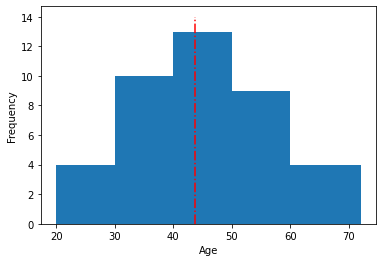

In [30]:
plt.hist(x=marathon['Age'], bins=ageGroup)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.vlines(marathon['Age'].mean(), ymin=0, ymax=14, color='r', linestyles='-.')
plt.show()

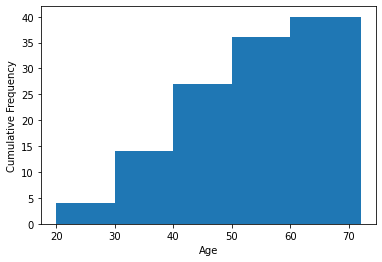

In [281]:
plt.hist(x=marathon['Age'], bins=ageGroup, cumulative=True)
plt.xlabel('Age')
plt.ylabel('Cumulative Frequency')

plt.show()

# 各种不同的均值

说起平均值，或许大家最熟悉的就是：相加再乘以个数，计算公式如下：
$$\displaystyle \bar{x}=\frac{x_1+x_2+\cdots+x_x}{n}  =\frac{1}{n}\displaystyle\sum_{i=1}^n{x_i}$$

这其实只是算术平均值，是众多均值的一种，其实均值有很多种计算方法，或许我们换个角度来理解均值，会比较形象：
> 均值就是从数据的最大值和最小值之间，选取一个值，作为整组数据的代表

虽然计算公式很简单，但实际上均值是统计学体系的基石，因为均值包含的信息量是所有统计量里面最多的，每一个数据都会对均值产生影响。

虽然均值非常重要，但实际上均值能够提供的信息实际上非常少，因此均值一般作为计算其他统计指标的数据。

就和选举一样，选择均值的方式也有很多种，区别在于一个点“你想通过全部数据知道什么”：
- 算术平均值：在合计的意义上保持本质，相加再除以个数：$\displaystyle \frac{(x+y)}{2}$
- 几何平均值：在乘法的意义上保持本质，相乘再开方：$\displaystyle \sqrt{x\times y}$
- 均方根值：先平方，再相加，最后除以个数：$\displaystyle \sqrt{\frac{(x^2 + y^2)}{2}}$
- 调和平均数：处理和“速度”相关的数据，个数除以倒数之和：$\displaystyle \frac{2}{\frac{1}{x}+\frac{1}{y}}$

先不考虑均方根值，下面我们结合一个例子，加深对调和平均数的理解：如果我现在要开车从上海去北京再回来，去程的时速为 $10$，回程的时速为 $90$，平均的时速度是多少？使用调和平均数就可以轻松地算出平均时速为 $\displaystyle \frac{2}{\frac{1}{10}+\frac{1}{90}} = 18$。

为什么我们不能直接使用其他均值计算速度的均值呢？因为“速度”的定义（单位时间内行驶的里程）本身就有一个计算，调和平均数只是还原了这个计算步骤。

假设现在 10 分是大雄的考试分数，90 分是出木杉的考试分数，全班只有两名同学参加补考，那这次考试的四种“平均数”是？

- 算术平均值：$\displaystyle \frac{(10+90)}{2} = 50$
- 几何平均值：$\displaystyle \sqrt{10\times 90} = 30$
- 均方根值：$\displaystyle \sqrt{\frac{(10^2 + 90^2)}{2}} = 64.03$
- 调和平均数：$\displaystyle \frac{2}{\frac{1}{10}+\frac{1}{90}} = 18$

你要是大雄，回家和妈妈汇报成绩的时候，你会用哪个平均数呢？（所以说，统计数字也是会撒谎的）

# 其他特殊的分布数据

## 截尾均值

在一些场景中，为了避免极值对数据的影响，我们会计算**截尾均值**。

截尾均值最常见的应用场景，就是计算跳水运动选手的分数了，一般我们会去掉一个最高分，去掉一个最低分：

In [257]:
trim_mean(marathon['Age'],1/marathon['Age'].count())

43.5

## 加权均值
在某些场景，我们会使用**加权均值**，结合两个维度：数值本身和权重两个维度。

最常见的应用场景，大概就是我们计算加权平均分的时候，需要结合单科考试分数和该科学分。

在使用加权平均数的时候，需要注意一个假设：每一个平均数的权重值，是人为设定的，如果设定不当，会对数据的计算造成很大的影响。

In [256]:
np.average(marathon['Age'], weights=marathon.index)

43.645121951219515

## 中位数

一组数据中间位置上的代表值. 其特点是不受数据极端值的影响. 对于具有偏态分布的数据, 中位数的代表性要比均值好。

在一组排好序数据中，数据数量为奇数，则中值为中间的那个数。 如果数据数量为偶数，则中值为中间的那两个数值的平均值。

In [258]:
marathon['Age'].median()

43.0

## 众数

一组数据分布的峰值，一组数据可能有一个众数，也可能有两个或多个众数，也可能没有众数。

In [259]:
marathon['Age'].mode()

0    43
Name: Age, dtype: int64

## 四分位距和异常值

把所有数值由小到大排列，按照个数平分成四等份，处于三个分割点位置的数值就是四分位数。
- Q1: 25%
- Q2: 50%
- Q3: 75%

第三四分位数 (Q3) 与第一四分位数 (Q1) 的差距又称四分位距 (IQR)。

异常值的判定和四分位距有关：如果一个值小于第一个四分位数减去 1.5 倍的 IQR 或者大于 Q3 加上 1.5 乘以 IQR，则这个数就被认为是异常值。

- $< Q1 - 1.5 * IQR$
- $> Q3 + 1.5 * IQR$

下面我们获取四分位相关数据：

In [260]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = marathon['Age'].quantile(percentages)
df.index = [f'{p * 100}%' for p in percentages]
print(df)
print("IQR:",marathon['Age'].quantile(.75) - marathon['Age'].quantile(.25))

5.0%     25.9
25.0%    34.5
50.0%    43.0
75.0%    50.5
95.0%    64.1
Name: Age, dtype: float64
IQR: 16.0


我们可以使用箱线图来可视化四分位相关的数据：

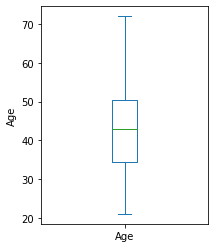

In [261]:
#marathon.boxplot(['Age'])

ax = (marathon['Age']).plot.box(figsize=(3, 4))
ax.set_ylabel('Age')

plt.show()

# 方差和标准差

前面的所有计算结果（各种均值、中位数、众数、四分位数等）在统计学上来说，其实都是“统计量”。这些统计量，其实都是在说明一件事：数据与均值的关系。

我记得之前听过一首打油诗：

> 张村有个张千万，隔壁九个穷光蛋，平均起来算一算，人人都是张百万。

这首打油诗生动形象地展示了算术平均数的局限性。

从上面这首诗出发，其实在日常生活中，除了想要知道数据与均值的关系之外，我们还想知道数据分散和波动的程度，最简单的例子就是：公交等候时间。

如果我们已知过去几趟车次的等候时间如下，正在纠结应该买哪辆车的车票：

In [23]:
#bus = pd.read_csv(DATA / 'Bus.csv')
bus = pd.DataFrame({'Bus A': [40, 40, 50, 60, 60], 'Bus B': [1, 2, 60, 88, 99]})
bus.index += 1
bus

,Bus A,Bus B
1,40,1
2,40,2
3,50,60
4,60,88
5,60,99


如果我们还是按照老套路，计算算术平均值的话，我们会发现，两组的算术平均值是相等的。

In [24]:
bus['Bus A'].mean()

50.0

In [25]:
bus['Bus B'].mean()

50.0

虽然均值相等，但是我们可以很明显地感觉到，两组数据是有差别的。因此我们可以尝试计算这些统计量：

- 离差（Deviation）样本值减去均值。$D_i = x_i-\bar{x}$
- 平均离差：$\displaystyle \sum{\frac{D_i}{n}}=\frac{1}{n}\sum_{i=1}^n{x_i-\bar{x}}$
- 绝对离差：$|D_i|=|x_i-\bar{x}|$
- 平方离差（离差平方和/平方和）：$SS = {D_i}^2=(x_i-\bar{x})^2$

还记得之前有“一面之缘”的均方根值嘛？要不我们试试求两组数据的均方根值（也就是方差）？

$$\displaystyle Var=\frac{\sum(x_i-\bar{x})^2}{n}$$

In [26]:
bus['Bus A'].var(ddof=0)

80.0

In [27]:
bus['Bus B'].var(ddof=0)

1730.0

计算出两组的方差之后，我们会发现，B 组的方差明显大于 A 组的方差，那方差实际上意味着什么呢？

不知道你们有没有冲浪，实际上方差和冲浪有相似之处。海水水位其实不是冲浪选手需要关心的问题，海浪高度变化，才是冲浪选手最关心的。

实际上，我们可以将均值理解成海水水位，而方差理解成海浪高度，方差越大，潮起潮落之间的海浪高度差越大。

在上面公交车等候时间的例子中，我们当然希望方差越小越好，因为我们希望每趟车的间隔差不多长，才能确保我们的等候时间是在合理范围内的。

除了方差之外，标准差其实是统计学中更常用的概念。

$$\displaystyle SD = \sqrt{Var} = \sqrt{\frac{\sum(x_i-\bar{x})^2}{n}}$$

In [267]:
bus['Bus A'].std(ddof=0)

8.94427190999916

In [268]:
bus['Bus B'].std(ddof=0)

41.593268686170845

那为什么我们有了方差之后，还需要标准差呢？很简单，我们可以用 B 组数据来做演示，分别计算 B 组数据分别加上 5 和乘以 5 的方差和标准差。

In [269]:
(bus['Bus B']+5).var(ddof=0)

1730.0

In [270]:
(bus['Bus B']+5).std(ddof=0)

41.593268686170845

In [271]:
(bus['Bus B']*5).var(ddof=0)

43250.0

In [272]:
(bus['Bus B']*5).std(ddof=0)

207.9663434308542

细心的朋友会发现：
- 加上 5 的方差和标准差没有变化
- 乘以 5 的方差是原来方差的 $5^2 = 25$ 倍，标准差是原来的 5 倍

由于方差计算过程中需要去平方，因此会放大数据原本的差异，在计算结果之后，我们需要开方，抹除被放大的差异。

# 标准化

## 偏差值

中国的考试成绩计算方式，是算绝对数，而日本的考试成绩计算方式，计算的是“偏差值”，计算的过程中，就会用到标准差：

$$ 偏差值 = 50 + 10 \times \frac{个人成绩-平均成绩}{标准差}$$

如果你的个人成绩是 60 分，平均成绩是 50 分，标准差是 5 分，则偏差值为：

$$ 偏差值 = 50 + 10 \times \frac{60-50}{5} = 70$$

如果你的个人成绩是 70 分，平均成绩是 60 分，标准差是 5 分，则偏差值为：

$$ 偏差值 = 50 + 10 \times \frac{70-60}{5} = 70$$

实际上，日本考试成绩计算的过程，就是“标准化”的过程。


首先，我们得先理解，什么叫**标准化**？统计学是这样定义**标准化**的：
> 标准化就是将分布中的各个原始取值转换为具有标准差单位的 $z$ 分数的过程。

下一节我们会提到 $z$ 分数，现在我们先不用纠结 $z$ 分数的定义，我们先理解**标准化**这个概念。

下面我们用一个简单的例子来讲解**标准化**这个过程：

## 标准化

大雄有两门考试
- 英语的成绩是 75 分，班级平均分是 70 分，标准差是 5
- 体育的成绩是 10 个，班级平均个数是 9 个，标准差是 0.5

问：哪门成绩考得比较好？

由于两门考试的测度标准不一致，实际上是无法比较的（而且体育和英语也不应该互相比较）

但统计学家发明了**标准化**这个概念，来对测度标准不一致的数据，根据其**位于分布的位置**进行对比。

标准化的过程如下：

$$\displaystyle \frac{原始取值 - 均值}{标准差}$$

英语成绩标准化的结果是：

$$\displaystyle \frac{75 - 70}{5} = 1$$

体育成绩标准化的结果是：

$$\displaystyle \frac{10 - 9}{0.5} = 2$$

我们无法对 75 分和 10 个直接进行比较，但是我们却可以比较标准化之后的结果。体育的标准化结果比英语大，所以我们可以判定：体育这门课考得比较好。

## $z$ 分数

- $z$ 分数是以标准差为单位度量的分布中，一个给定取值与均值之间的距离数。
- $z$ 分数有助于理解个别取值与分布中其他取值之间的位置关系。

## $z$ 分数计算公式

实际上，标准化的过程就是 $z$ 分数的计算公式

$$
\begin{aligned}
\displaystyle
z &= \frac{原始取值 - 均值}{标准差} \\
  &= \frac{X - \mu}{\sigma} \\
  &= \frac{X - \bar{X}}{s}
\end{aligned}
$$

其中
- $X$：原始取值
- $\mu$：总体均值
- $\sigma$：总体标准差
- $\bar{X}$：样本均值
- $s$：样本标准差

- 如果原始值大于均值，则 $z$ 分数为正
- 如果原始值小于均值，则 $z$ 分数为负

我们可以用`statistics`库来计算 $z$ 分数

In [33]:
mean = 70
standard_deviation = 5
zscore = statistics.NormalDist(mean, standard_deviation).zscore(75)
print("z-score of  English:",zscore)

mean = 9
standard_deviation = 0.5
zscore = statistics.NormalDist(mean, standard_deviation).zscore(10)
print("z-score of PE:",zscore)

z-score of  English: 1.0
z-score of PE: 2.0


In [34]:
marathon['Age zscore'] = stats.zscore(marathon['Age'])
marathon.head()

,Age,Age zscore
1,49,0.448998
2,44,0.029374
3,50,0.532922
4,46,0.197223
5,31,-1.061649


# 结尾

偏差值与考试人数和考试难度都无关，和每一个考生的考试成绩汇总的平均成绩相关。

我一直都认为，这种计算成绩的方法包含的信息量，以及背后的逻辑更深刻：
- 每一个参加考试人，冥冥中和其他参与考试的人都有关
- 偏差值的不同，也仅仅是你和别人不一样，偏差值高低，并不能决定你这个人就是没有用处或者价值的
- 偏差值就是偏差值，比较“特殊（低）”也没关系，重新思考一下适合自己的人生道路就好了

最后多唠叨两句：

- 诸葛亮：出生于 181 年，在 207 年（26岁）对出《隆中对》
- 牛顿：出生于 1643 年，在 1687 年（25岁）出版《自然哲学的数学原理》
- 马克思：出生于 1818 年，在 1844 年（26岁）写就《1844年经济学哲学手稿》

26 岁的你我，或许研究生刚毕业，或许刚工作两三年，他们的 26 岁已经建功立业了，你我该怎么办？

很简答啊，这只能证明，你我的人生道路，和上面三位不一样嘛，他们走他们的路，我们走我们的路就好啦。